In [10]:
from  PIL import Image
img = Image.open('bw.jpg').convert('L')   

In [14]:
#img

In [12]:
import numpy as np
print(type(img), np.min(img), np.max(img))

<class 'PIL.Image.Image'> 0 255


In [13]:
img = np.array(img) 
img.shape

(397, 600)

In [9]:
img

array([[29, 31, 33, ..., 20, 20, 20],
       [30, 31, 33, ..., 20, 20, 20],
       [32, 32, 34, ..., 20, 20, 20],
       ...,
       [34, 33, 33, ..., 81, 80, 78],
       [29, 29, 28, ..., 77, 74, 71],
       [27, 27, 27, ..., 73, 69, 66]], dtype=uint8)

In [15]:
from  PIL import Image
img = Image.open('color.jpg')

In [17]:
#img

In [18]:
import numpy as np
print(type(img), np.min(img), np.max(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'> 0 255


In [19]:
img = np.array(img) 
img.shape

(822, 600, 3)

## IM2COL

In [23]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col
    


In [24]:
import numpy as np
x1 = np.random.rand(1,3,7,7)
x1.shape

(1, 3, 7, 7)

In [25]:
col1 = im2col(x1, 5, 5,stride=1, pad = 0)
col1.shape

(9, 75)

## 使用ANN 辨識手寫數字

In [26]:
import keras

C:\ProgramData\Anaconda3_2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
x_test.shape

(10000, 28, 28)

In [36]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

In [37]:
x_train.shape

(60000, 784)

In [38]:
x_test.shape

(10000, 784)

In [39]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [40]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [41]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [42]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.2395 - acc: 0.9291 - val_loss: 0.1064 - val_acc: 0.9690
Epoch 2/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.0920 - acc: 0.9722 - val_loss: 0.0890 - val_acc: 0.9720
Epoch 3/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.0602 - acc: 0.9815 - val_loss: 0.0708 - val_acc: 0.9764
Epoch 4/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0709 - val_acc: 0.9790
Epoch 5/15
60000/60000 [==============================] - 3s 44us/step - loss: 0.0327 - acc: 0.9893 - val_loss: 0.0778 - val_acc: 0.9774
Epoch 6/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.0243 - acc: 0.9920 - val_loss: 0.0618 - val_acc: 0.9809
Epoch 7/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.0217 - acc: 0.9927 - val_loss: 0.0802 - val_acc

## 使用CNN 辨識手寫數字

In [45]:
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

### 資料前處理

In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [47]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [48]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

### 設定網路參數

In [49]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建立卷積神經網路

In [50]:
model = keras.Sequential()
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 訓練神經網路

In [52]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 22s 366us/step - loss: 0.2094 - acc: 0.9400 - val_loss: 0.0830 - val_acc: 0.9740
Epoch 2/15
60000/60000 [==============================] - 22s 362us/step - loss: 0.0676 - acc: 0.9797 - val_loss: 0.0604 - val_acc: 0.9820
Epoch 3/15
60000/60000 [==============================] - 22s 369us/step - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0446 - val_acc: 0.9855
Epoch 4/15
60000/60000 [==============================] - 22s 362us/step - loss: 0.0310 - acc: 0.9910 - val_loss: 0.0529 - val_acc: 0.9823
Epoch 5/15
60000/60000 [==============================] - 22s 364us/step - loss: 0.0227 - acc: 0.9932 - val_loss: 0.0462 - val_acc: 0.9847
Epoch 6/15
60000/60000 [==============================] - 22s 362us/step - loss: 0.0165 - acc: 0.9950 - val_loss: 0.0463 - val_acc: 0.9866
Epoch 7/15
60000/60000 [==============================] - 22s 363us/step - loss: 0.0128 - acc: 0.9961 - val_loss: 0.

In [53]:
model.save('OCR.hd5')

In [56]:
for ele in model.get_weights():
    print(ele.shape)

(3, 3, 1, 16)
(16,)
(3136, 256)
(256,)
(256, 10)
(10,)


In [58]:
14 * 14 * 16

3136

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               803072    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
_________________________________________________________________


In [93]:
from keras.models import load_model
model2 = load_model('OCR.hd5')


In [94]:
#model2.predict(x_test)

In [98]:
from PIL import Image
import numpy
img  = Image.open('4.jpg').convert('L')
img  = numpy.asarray(img)

In [99]:
img2 = (255 - img) / 255

In [100]:
img3 = img2.reshape(28,28,1)

In [101]:
y = numpy.array([img3])

In [103]:
numpy.argmax(model2.predict(y))

4

## 明星圖像辨識

In [10]:
#data:image/jpeg;base64,

In [8]:
import requests
import base64
imgdata = b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUTExMVFRUVFRcVFRUXFRUVFRUVFRUXFhUVFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGisdHR8tLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLi0tLS0tLS0tNy0tLSsrNy0rKystN//AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAECBwj/xAA7EAABAwMCBAQDBgUEAgMAAAABAAIRAwQhBTESQVFhBiJxgRMykRRCobHB0SNSYuHwBxVy8YKSM0Nj/8QAGQEAAwEBAQAAAAAAAAAAAAAAAQIDAAQF/8QAIhEAAgICAgIDAQEAAAAAAAAAAAECERIhAzETUSJBYTJx/9oADAMBAAIRAxEAPwB7TbKPpEDkgGUnSeiKoUCea4YLZzrsbWtGUX8IBLbau4KdrnE52VbKWg1ilY6ChPigKcVQQsmw2GPuBC4Y5QiEXTpp+wnYeugVE5uV20LIYB1gAsd6LyypS8x9SvSfENeKbo6Lz1jSRKnJqxV2daaf4jQr/afKvP7A/wAUdle7er5UYA5AldtcEC65W6TyUWyaYU/KloUeq4ptUj7kMEkgBFDr9CBTCgrMjulv++8buGmC49f82RDHvOXOA7AfuqYhtPoJ+BxDn7qQUoCjpXQaJkx34QPxK069ByR5fWB9dkcaDRBUcgb4SE6ZRZUHlwe+ClmqWxZuFNxNVDXT64LQh9XuYbAKD09ryMAru70+q7OPqtjYrbo5o3Lo+Yrk1J5oaHNwRC4NRMkSbJ3uSu9eZU76yXXtVMibZ3SqSp2uKG01vNPqdAEbLDRQv+OVNTrTut17eCh6lueRWo1MlMLFptm/qsQofBktnRLmzyQ1xWLXcAElNbL5Yjko6NAcXEd1xwTfY9a0Q2dB+5R1MGMqdrguKr+QVHroNUAVzlaFQypQ2SjLe1G5QhbYqTZq3emLakLplNoGwXFVsq+JRKjs1FnxcIapRMYXNCg6MoBsrvjW74WY54VToXQ4QrT40tJpE8wqFbqUls0Vsa6YeKrKutE+VVDQqfmlWxmy0WLy9kgokoqgIXFJZcV202l7jAAkqi2SSrZmo37aTeJx7AcyegVS+21LypwtMMBhzht3a3qervYJbq9++5qRMDbGIH8o6Y3PsuNR1cW1MUaMcRGT+gjkrKOK/TL5PfRZ6mp0rZvBTj16noM+YpdX10ugzBP3fmx7Y+mFVLdxeZe+dyTM+wGwH+dll3fNaJO3Ju7n+v7LJMs5JLRZKOrPe6OLc+wHqFarOp5eEV2gx8pBk9pcIP05ryu0dXrOHCRTHKMfQDKZ2dq6jVDTeOd/+eSQ7pBPl9VpFONXs9W0QAnoRuBtPZG6m7HI9juR27pV4eyQ6cxB5Ex1CN1UhwIIIPUb+oK0QT0G6e5paC3b8fQqeq4AKiM1erSDmtMvHJww7PzYO/JLKutV3u/iOOPujARJ50i5agAZSC4aQYWmauOHMqKjqDXOSMWSTVmVKT0MLcl2VYGuaQtMY3osidA1lawmbRCxgAWB8mFh6IKh7IeqSOSaGmhqsIpDYUQtvBGViiNELabE2THFKnjC5NqIKms3CF3VqBcySSCC2whQXxPJTPqAFcVKwQyAwezOdt0fUoOOy4tuGJTK2cCE0YX2ZIBpU3c5RVNSOPZCvcTsCmToNUGBbcYQHx43Q9e6nYo5GyE3ja7ApOHOF53b5Vq8XtPAVVbAKU3Y3E7ZZPDbZKubKYhUnSH8Lla6N0SAkiDleyd2FUfGWrGRSbygnu47T2AyfZWitWABJ5Arym/uvi1HvJxJHtOfc4C6OP2Ql6Cba5FNhdPWCd85Lj67/RJqNYvJed3fUD/r813qbjwhn8x/Dc/hCioCd9vyA3/EqtjqOg51YkYHp3KHeQzzPyeQ/YdFj68Ceuw/JMNH0Z1V3G/mtOaiinHx5sEsfjvMtlo/RPdH05z3fxXuJBBElxPdWG004NGAu32wGQMqGbOuMEiwWtbgYJ80bR80enOFA7UmvMOkj7r+fv0KrFxcVG7uJj5XZJwdj/N+aGOsEmHEesSCTza4ZnsVszSghxq2HB25BgmOR2Pp/bojXaV8Sm2q3mM9iMEJANUFVpbu8DiA5PbsQOhVo/0/vhUp1KczwODm/wDFw/cJoys5pwEd1SgJYHkOwrh4m087gbpTaaTjO6ci1RFa3jk2tqpKW1tNLThEWjHNOUGLY0e4wgG3Za/sjW5CCubcbpNgbDLjUwG7pZSuC7KDr0imdlQgbKmQ2VkJuyFiKdQCxa2EPpXsGFzc3kKu0b2TKMe5zhhckVYWdVr0nmuDcHqll05zSpLZxcjQmxqy4MbkKy6RTJbkqqNpFWOyrkNx0TQtPY8Ox26AuQQk7rkk5KnpkjKrmVWzNSozkFK2NI3Tyk0u3C7r2bSNkGrFcLKB4rd/DI6qpacFefEtv5XAjkVSLNSqgw0xzZnKsdscKtW5hNra8GySIvN/RvxLdFlvUP8ASQPU4XnFq35Qf+R/T8/yVy8Y1SbZ0RlwGdt5/RVANgGN4/LA9BOV0R0hYqwes7icXHYYHuV2RDQNpy781ujT4oA/wbT9B+Sg1B5c7gGZMJkyqQVotsa9XGw2/dek2NkGACFVvC9vXoDNCZ7iVfLR3E0Et4T0KnLbOqEcYkBpqJ7EdVbCR6xe1WwKTOInn0QGMu6OCqPr9s5nnbMc+8fqrE2reHdrR7hQ1Ld7wQ9sHqMgoaQHsqljqsEHMgkieUxI/RX7wFdBl55T/Dr0zHZ3zR7QfqvK9QmjcObtBke/7q2eDb51Ku2nUBaWu4mjnwuOwVXSpkKu0e6VwCMpPUpAEwpHXhIBDpBEg9iuQ4JrsjIHqMC5LAob6tGyEpXU81mydDAUwtm3BS2pe8PNRt1tqVMNIYOs2ypAAEt/3YO2W2VHORyDr6C3OCxcCi5bTBoqVLJwrDb0zw7HZL9JsSI4grXRpAN9lCCKS2Vi6tzPZGWNuFxqj4Md0RZVMQjexKDPgwF39ra0bjCDvK/C2cqq3AqVXw0kSe6zdAei12dY1HyNlYaJHNKdAsPh0wCZKOrHKm5VspHob0iF09yBs6iJe5dF/EIl162D2OB6LzG0pQ4joSPxXqGtnyH0XnVqzJ9T+a44ydsKXyJyICGo187pjwe/bqhG2QLjwn2O/wDdPFHPz/0Q+IjNAADd7VWSQGuPUwO+f8/BW3xDZOFu0TBLwD6c1WnUQSA0SG4k7cXp+/RVXQYdHNu3haXbE7DsAltg93x28IBdxQ3iwB3J6JpdtMBjcud5QOed/wDO6uOg+FadNg+I0OdGT+gWyOqECt1tZuaVwKJDXO4+ABoIJOMxO2R+avehXxqNyCCMEdCN1qpo9PiDg0yMAl7jAR1hYtpjAA9FnT6RVa7dnGqP4RKQa5fup0yabQ5waHGTDWhx4QSfX8lYdVZ5UsbatcDLQSRwk9W9DHJat7BetFDtder1WPqCIYQCI3kTg9eysmk3LqrZLSPVHu0KnsG4mYkkT1hGMtgxsAQhKn0ZWkUjVtGp1Lh5cYMNI6IHQ3fE1DfibTME8jwjcf8Akn3iRwpGpWP3aYaB/VyHckkJd/p1aBlKpVcfM50T0gz+KVdNgnqkeifagAABn/JUB1CEA25kIetURg2c8kMbm44gggXBBisQU1tXhwVOybF76pcYWm6UXZJTj/b8yug2MQjQMSCysQ1OqLAlFa5LQlz9eIRWjWkXEOCxU9utlYnsORZqjMbKKlXIEJjbU8KStbiCpYj2Im0Q52eqYW1lC6tLMAymJZASqIE7Ia9s3hIhVeQ2p7p3qN04Ahv1VVL5MlCUgTki20bsBqjp1C4pFa3oGCnNnWBWcFIKlYwbIyiG1kI1y3WJjCpJaGsC1+7hjvQqk2J3PUpj4mrPAjklmnjAXIlVjQdyHtCxL2zMInSdKbSJfVPFjDeWeZKL09wDQD0UlSnxSOUQqwdE5pOVsq2vVTUkOLA2cDiA7csqu3dyymPKZgbxwtA6NHM91P40rCjV4WATwyey8/1K+e/BPaBhUjHIbSPR/BTGVKoqFzXTIABBLSOo5c16SxohfN/hrU/s93Sqz5Q8Ncf6HYP7+y+j7V8gFCUcZHRCeUTRYuwtuUVem4thri3uIn8QUbCyHVPlSqzqZ4T/AIEXqZc9vC10EYLoBPsDhQ2bPNJiYAS22HFIMIQlU5RlRyjsrf4lRrepz6DdBu9BelZV73S693PDbu4GOc4PeQ1rnjytMbloknuYRlp4XNvbATJkudjeV6TctEBu04Q19Ytezh2xA7YVcNUcrbbPMnCAuBVTjUNOLXFpG3PkUoubRw2ykoVkrQCjNPHC5Imvew5GExo3chHoRltZWbCi42kqstvHExKdWVCeaa7Ndnd9SBBVC1SkWO8vVei1LbG6WVdGa8yU4GmU+i4wMFYrm3RGLaNGpj8PMKdjpCVU71pEyibO44tlz5bDYWypDoRRfKGqU8Sg2XJDoWejPRNqDMKialV4XuhXDV6hLIHNUy8oZ8yWS2SmwNl66Z5J/pGpgndV64c0NSS3uyH8QPNMtDRZ6/TuBCMoODlQ7DW5gHdWayvAG7pnIutgvi9rRScT0VT0ytMBH+MdTDgGA7nKV6Q3zBSkPH+i4WFQgJnbwQl9FuF02sWtJWiwTWzzPxHNWtWcBs4z6DAVErOz3z7SvUtQo/AqPFQfw6xJDujuYPQwV55qVs1r3cJJbPlJESOq6ON/QkkKHNXuP+lviH7Taim4/wAWjDHTuW/cd9MeoXibqasH+nt26lfU4McXExw5ERIB9wqciuP+DcUqke+1nwJGUjfr1USDbPEc5afeAU4t6oeO/RdVaMjZcqZ2xcU/kirXOuuzw03HExwxJ6SdlrQtWfVcQ6kWdy4EfgnFSyBJkKP4LaewhBstN8bXxRNUcn/huzhpqHd2B6f3/RVC4u4MDJ5du5V90b/4Kf8Awb+Sbi3I5OXSCqrct7H9CFjmrp2VyHrpOcX3WmtcZKV3GktHJWFxULmylo1FMudHHQJdd6PjGFfalBvRIdUhpSitFSo2DgZT/Ti4brmk8Hki2VRC1AoKc9dUqR6JO/VGh4acfkntncAjcJkYiLVpEOqNWJjHnGuXrqZEKw+H9VmJPJVvU9NqVTkmENTs30yIJIXFBUtk6a2j1Cvft4dwkzLqHKtsFYgZMdFulUcNymbC5WW+rVDm7gqo648g+VMLC65Li/oyZOyaOyUtlJv6z5gjdDBpCu7dMZUGyFu/DoiQURopiTTQ7fknL9VcBDRnupbey4QoXUwHdkGireKEt1RqudxuE+iO0ytBCaXUcO4SK3eTUAAzP/QSzQ3DL2eiWNPiapK9MNBnZc6GfIJ3Xer5aPx+iVKlZfsR3OkGr56kOZk8JOB39V5Tqxbxu4ZIBhs7wF6f4jv3spOa0wCIJ6CM+68nuXQJ7/Uq/ETmgO5P1/JGeHagZc0X/wBYn12/FLGcRJRVOmQe+CCrvonF0z362OARumNK6EZwqb4I10V6YDj52iD3I5q2NC4qaO5NNG6tdg3ISm6ueIw0e/8AZG3FKVAKMJXbHVIWPoxk7q+aTdAUac/ygfRUy5an3h+5a5vw3ck/HpkuVWWRtYHmsqHmo6dAAYWngrqVnOZSrAqXdLJglG21RawHT6BPNAXGmSZOU3DlFVctQCuXmnBuyVcMSJT/AFRxjCrz2klTlKjULryiHEJlangasbQHRcvzhZSBVGP1TOyxQm0CxbZhvZsYWbDuk9ai0ugDYoIVKtOWtKI0+m/il26gwP0HOtoalg4QTIVtbRaWJLVshJTuI2AmfWDXYR0h4Q1xp8OlHUKAARiqEcCC3pPB7Ld5ccIhGteAoK1IOyjRkhOasnZdMpAlGPtgIR9naNduslYWiO30pjhkLkeHmA8TW5TOCzbZN7JvEAYRr6HUEI6dF7MxCkL5Hm/Db6Kx1KAO6r2pOZTnnH+ZSyjQ8bKz4l07yjMjpzgn81514loBjg1o8rZHuNz+KveqV6lUzBDcEE4BHYKtaxafFDgAOIHi+u499/qtDQJ7KZajzxy2/dPr2y4RSPVuf0S1lA8YaOoHuTG3+bK0apSlxA2a3hHqBkqsmSQs8LXho1wQYDvzC9msrgPaCOa8PcIqsa37ufdeu+GnngA7KMls6odDeoFC9qL4Vw9iDRSxZcMW7IFpkIiq3KlpUVlEVyH2nXkiCjqjJyEltKJTS3eRhXXRFoX3BOYUdjWIOU7q0Gv3Hul11p7hlufz+iVpoGmMGVAoq1YJI69c3EFB3F84o+RAcaGd9ctg5SCrWHIqK4cXZlDOEKfJJSETo6q13cio/tBXFT0UUSgtGcg8XK0gViexckdfbgak7BNKdYRhK6OluxIz1Vi0+xbwiRlIojxiD0LmqRDGF3dcsuHD5hBVjtKbW42S/wAQ0GubI36qlaKCO4uJ5qL4pjCiFmTzUlK2LUBGjdmSXeYJ7Tt5GyW2Qk7Kx29PCKRkhUdLD/mU9DT/AIe23dMWnK3VeAjQaQK6lO6Z2TREJaypxu4W/wDQ6ptTaGiAtFbCQandNp03OPIEqhU7rjd8R44iSfhs3AH8zuqtHixhNtUjJjb3Xn9a5dToAA8NR4l0gy0cmjphT5HsZE2s3DjxQQXcyOXr09FTLq8LD5TLiM8/fusr/FcQwPMuMdAe6Ys0xlJhnJIkk81kq7FbvoTWb+OqwwA8nDfeAZ6Jrq1XgBAMmDnrMku+v5IDw48OrvrOgBuB0aNsd4ge6mvSatSQNwPbEx3KZ9gjG0RaFYl9YTzM+y9Y0q14AEh8J6HwgPcMq5U6SV7LdI7atOZhSNauno0awMUpKZ2raTd5J7/shgF2mQrGjbmmtPvmBLIXBYmsWkNBqQ6KZl83nhKabVKGo2akMazKVT5gD32P1SLUtBc3zUyXDp94enVN6DQjGuWaTEaKE9i3bWgccqza3pweC9ohwyf6h+6rZrFnJc044sEaXZJcWrQhfs7VDVvHOK1xuKDYXKJy+kJWLcFYjZIsT6YAQj7kt2K4rVzCV1q56SqnRYxr6g6IG6iFYvEEoZtWdwmLLORIWA1ZBSdGEba0+LcIejQj1TLSwAYRQaCaOnjeESaZARjIhR13BPQBUasFDXtziAuryOKVjGpW0ZJnWi0y1pcd3H8AjnV0vffMa/gdLRwyDEz1MdAuqt3SHEC53l4Z8pIAf8rp/lMbp/HKifkhfYg8Ra44udSYQA0ec/ovPdW1OCecbuP6BPr+g8muGyXOrGXHAa0ZE+xCquqWIbSfBLnNMSebz80emB6qKjvZSUtaBNJvn1Kpjk0xPU4mOSsGtV+FjmjJIa3/ANo/Sfoqx4ac0PMzOwPLB2TrUXS4u6NB9xhPKPyQsXoVaXJd8MbF3Ee/RegeHtBmHEQPzhJPBuiMAqVKxe1zQHEBsgMcYD+42mNl6NTrU2cQJeAwsafKIh/yPx90x7J3wyewR54RC6NIDYIloQgvabeIOeW8NT4bpaYaSJBJ6EbHZTC4b/N/9gpnykcLjEcXSZkeyHhl6D54ewgBZCgN6yWgvGX/AAzIjgfE8Ls4XVO4Y4NIe3zO4BuIfiWnoey3il6N5oeyThXcIe3u2P4YcPM4sEyPO3dpnY9luleMIb5gOJ5Zn7rwJ4HdCt45ejeaHsmXJXBrtz5mfPwbn58y3scLvjbnzsw7gGZl+fL2ODut45ejeWHs7YpAFFw7w5pglvTzCfL64Qd9qoomHAk9s5B/uPqsuOT+jPlgvsZcZC5NyQg26iHMDwMc5IBAkifQRlDvv55R8skkQOJxbJzsCIPqEfHP0byQ9jMakAcoS4seMy3YquapqQBbxHha53DO8ZgkdcqzaFcywg/cMCSCYgET33ScnHLG5GjyQk8UQjw/iSc+mEMbKMQrN8SVz9nBUXG+iqgirfYXdFpWg0wsQxN40VWpgLX2YRK2sVRAC4pxlMNJvJEFYsWj2F9B3BmVNbURk7FYsVKA2bfeuYYlSVHveOS0sSS9BOW2RIkla+ARzxutrEFFWgt6EOs3MVKTjsJPMeQED67pm+tAcT8hc2Mcvkc3/wBh+KxYvSa0jyotuTKVqt4S4gYJMmOZ2BP0SDUGAtLRs0A/V2T65lYsXmrs9D6K9TtPhu4+Rd/dPW03VHUmiJe8fngLSxUW5IXqLLz4frvIFOWPDH1BXPBw+URDG9cu3/pTi1u3RSe8sDHFzHnhMl8uDGACfKJ3JWLF3Lo4W2SWdzUeRSdwOeHn47S0QaRngIOxOWz69lpt/NP4zgwtLnF5DTL+B/BSgHbrJ2hYsRqwW6Ni7MM+I1pJBq1ecfMKT5AyZAHaERSqhzGOcxgNWHxnNVreNskTEBrcraxZxRoyezKYqFjagp0uFzTVqNzIrACHAnHIfioTVe0tpVKTHcTHVKpbgFwEtMH2C0sSod9WYw/EaHVKOapJf5xg0pLY9YA9lyxtGvR+Oafzgl4DiDNIudLe8z0WLEaEUt1+AovratAh4+1AuP8AS6nx5B5OMbjohNU1BldrX0pgveM9eFhnPoCtLE+KTJ5tonZXa2gASZI4XYkBp43udjeGiYHourq5Aplz3OaCXMcfMeEVh8Tk6TDWtED+aNgsWJWUTEHii7bUp8Qa4NY/hGeZb8QYmMgt+sck58FagSSC2G1HSBvA2aeszgraxaSTi0wccmppl8FNdArFi87o9g4PosWLEKCf/9k='
with open("1.jpg", "wb") as fh:
    fh.write(base64.decodebytes(imgdata))

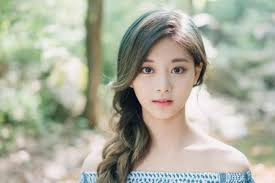

In [9]:
from PIL import Image
Image.open('1.jpg')

In [19]:
import requests
res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format('周子瑜', 200))
res

<Response [200]>

In [20]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [26]:
path = 'idol1/'
for link in soup.select('img'):
    res = requests.get(link.get('src'))
    fname = path + link.get('src').split('tbn:')[1] +'.jpg'
    with open(fname, 'wb') as f:
        f.write(res.content)

In [27]:
import requests
from bs4 import BeautifulSoup
for n in range(0,3):
    res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format('周子瑜', n * 100))
    soup = BeautifulSoup(res.text, 'lxml')
    path = 'idol1/'
    for link in soup.select('img'):
        res = requests.get(link.get('src'))
        fname = path + link.get('src').split('tbn:')[1] +'.jpg'
        with open(fname, 'wb') as f:
            f.write(res.content)

In [29]:
import requests
from bs4 import BeautifulSoup
def getIdolPicture(path, idol):
    for n in range(0,3):
        res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format(idol, n * 100))
        soup = BeautifulSoup(res.text, 'lxml')
        #path = 'idol1/'
        for link in soup.select('img'):
            res = requests.get(link.get('src'))
            fname = path + link.get('src').split('tbn:')[1] +'.jpg'
            with open(fname, 'wb') as f:
                f.write(res.content)

In [30]:
getIdolPicture('idol2/', '郭雪芙')

In [31]:
getIdolPicture('idol3/', '蔡依林')

## 臉部偵測

In [35]:
! pip install opencv_python-3.4.3-cp36-cp36m-win_amd64.whl

Processing c:\users\user\opencv_python-3.4.3-cp36-cp36m-win_amd64.whl


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
import cv2

In [38]:
#ls idol1

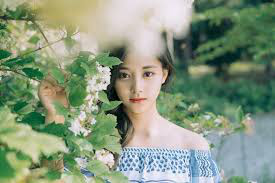

In [44]:
from PIL import Image
img = Image.open('idol1/ANd9GcS2VrzjcNpJ_Ar1PTHTTv88C2jxWBMeI2StTviVuEt3mdnAdCSl.jpg')
img

In [45]:
import cv2 as cv
imgary = cv.imread('idol1/ANd9GcS2VrzjcNpJ_Ar1PTHTTv88C2jxWBMeI2StTviVuEt3mdnAdCSl.jpg')

In [46]:
imgary.shape

(183, 275, 3)

In [47]:
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

In [50]:
?face_cascade.detectMultiScale

In [49]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(imgary, 1.3, 5)

In [52]:
x,y,w,h = faces[0]

In [54]:
crpim = img.crop((x,y, x + w, y + h)).resize((64,64))

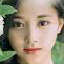

In [55]:
crpim

In [56]:
import os
os.mkdir('idol1_face/')

In [60]:
src_dir  = 'idol1/'
dest_dir = 'idol1_face/'
for f in os.listdir(src_dir):
    filename = src_dir + f
    img = Image.open(filename)
    imgary = cv.imread(filename)
    faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
    if len(faces) == 1:
        x,y,w,h = faces[0]
        crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
        crpim.save(dest_dir + f)

In [62]:
import os
os.path.exists('idol1_face/')

True

In [63]:
def extractFace(src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)
        
    for f in os.listdir(src_dir):
        filename = src_dir + f
        img = Image.open(filename)
        imgary = cv.imread(filename)
        faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
        if len(faces) == 1:
            x,y,w,h = faces[0]
            crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
            crpim.save(dest_dir + f)

In [65]:
extractFace('idol3/', 'idol3_face/')

## SIFT

In [69]:
! pip install opencv-contrib-python

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import cv2

img = cv2.imread('idol1/ANd9GcS2VrzjcNpJ_Ar1PTHTTv88C2jxWBMeI2StTviVuEt3mdnAdCSl.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SURF_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img)
cv2.imwrite('sift_keypoints.jpg',img)

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1016: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


## 使用CNN識別明星

### 建構卷積神經網路

In [62]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [63]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [64]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
import os
idol1 = os.listdir('idol1_face/')
idol2 = os.listdir('idol2_face/')
idol3 = os.listdir('idol3_face/')

In [26]:
from sklearn.model_selection import train_test_split
idol1_train ,idol1_test  = \
    train_test_split(idol1, test_size = 0.2, random_state = 42)
idol2_train ,idol2_test  = \
    train_test_split(idol2, test_size = 0.2, random_state = 42)
idol3_train ,idol3_test  = \
    train_test_split(idol3, test_size = 0.2, random_state = 42)

In [27]:
len(idol1_train)

168

In [28]:
len(idol1_test)

43

In [15]:
os.mkdir('trainset')

In [17]:
os.mkdir('trainset/idol1_face')
os.mkdir('trainset/idol2_face')
os.mkdir('trainset/idol3_face')

In [16]:
os.mkdir('testset')

In [18]:
os.mkdir('testset/idol1_face')
os.mkdir('testset/idol2_face')
os.mkdir('testset/idol3_face')

In [19]:
from shutil import copyfile

for f in idol1_train:
    src = 'idol1_face/'+ f
    dst = 'trainset/'+'idol1_face/'+f
    copyfile(src, dst)

In [29]:
def copyFileToDst(dataset, datafolder, srcfolder):
    for f in dataset:
        src = srcfolder+ f
        dst = datafolder+srcfolder+f
        copyfile(src, dst)

In [30]:
copyFileToDst(idol2_train, 'trainset/', 'idol2_face/')

In [31]:
copyFileToDst(idol3_train, 'trainset/', 'idol3_face/')

In [32]:
copyFileToDst(idol1_test, 'testset/', 'idol1_face/')

In [33]:
copyFileToDst(idol2_test, 'testset/', 'idol2_face/')

In [34]:
copyFileToDst(idol3_test, 'testset/', 'idol3_face/')

In [65]:
training_set = train_datagen.flow_from_directory(
    'trainset/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 377 images belonging to 3 classes.


In [66]:
test_set = test_datagen.flow_from_directory(
    'testset/', target_size = (64, 64),
    batch_size = 10, 
    class_mode = 'categorical')

Found 96 images belonging to 3 classes.


In [70]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=30,
                         steps_per_epoch = 30,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/10
 2/30 [=>............................] - ETA: 2s - loss: 0.0017 - acc: 1.0000

C:\ProgramData\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\ProgramData\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=30, verbose=1, validation_data=<keras_pre..., epochs=10, validation_steps=30)`
  


30/30 [==============================] - 2s 71ms/step - loss: 0.0305 - acc: 0.9933 - val_loss: 1.2695 - val_acc: 0.8021
Epoch 2/10
30/30 [==============================] - 2s 69ms/step - loss: 0.0814 - acc: 0.9633 - val_loss: 0.8932 - val_acc: 0.7951
Epoch 3/10
30/30 [==============================] - 2s 71ms/step - loss: 0.0468 - acc: 0.9833 - val_loss: 0.8382 - val_acc: 0.8472
Epoch 4/10
30/30 [==============================] - 2s 71ms/step - loss: 0.0335 - acc: 0.9900 - val_loss: 1.2465 - val_acc: 0.7326
Epoch 5/10
30/30 [==============================] - 2s 75ms/step - loss: 0.0211 - acc: 0.9967 - val_loss: 0.9655 - val_acc: 0.8403
Epoch 6/10
30/30 [==============================] - 2s 72ms/step - loss: 0.0283 - acc: 0.9833 - val_loss: 0.9811 - val_acc: 0.7986
Epoch 7/10
30/30 [==============================] - 2s 69ms/step - loss: 0.0178 - acc: 0.9933 - val_loss: 1.3693 - val_acc: 0.7917
Epoch 8/10
30/30 [==============================] - 2s 71ms/step - loss: 0.0180 - acc: 0.9967 

## 利用模型分類圖片

In [71]:
url = 'https://www.elle.com.hk/var/ellehk/storage/images/celebrity/feature/chou-tsz-yu/25904963-1-chi-HK/13_img_885_590.png'

In [73]:
import requests
res = requests.get(url)
with open('zhiyu.png', 'wb') as f:
    f.write(res.content)

In [75]:
from PIL import Image
img = Image.open('zhiyu.png')

In [80]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv.imread('zhiyu.png')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces[0]

array([398, 142, 245, 245], dtype=int32)

In [81]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)

im = Image.open('zhiyu.png')
crpim = im.crop(box).resize((64,64))
crpim.save('zhiyu_face.png')

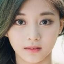

In [82]:
Image.open('zhiyu_face.png')

In [83]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('zhiyu_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [84]:
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape


(1, 64, 64, 3)

In [85]:
classifier.predict_classes(test_image)

array([0], dtype=int64)

In [87]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv.imread('puff.png')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces[0]

array([112, 125, 280, 280], dtype=int32)

In [88]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)

im = Image.open('puff.png')
crpim = im.crop(box).resize((64,64))
crpim.save('puff_face.png')

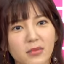

In [89]:
Image.open('puff_face.png')

In [90]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('puff_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [91]:
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape


(1, 64, 64, 3)

In [92]:
classifier.predict_classes(test_image)

array([1], dtype=int64)

## 驗證碼識別

In [143]:
import requests
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
with open('kaptcha.jpg', 'wb') as f:
    f.write(res.content)

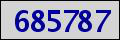

In [144]:
from PIL import Image
Image.open('kaptcha.jpg')

In [145]:
pil_image = Image.open('kaptcha.jpg').convert('L') 

In [146]:
open_cv_image = numpy.array(pil_image) 
open_cv_image.shape

(40, 120)

In [147]:
ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)

In [148]:
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [149]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
#cnts

In [150]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    if w >= 15 and w <= 20 and h == 24:
        ary.append((x,y,w,h) )

In [151]:
ary

[(14, 9, 16, 24), (30, 9, 16, 24), (47, 9, 15, 24), (95, 9, 17, 24)]

In [180]:
dest = 'digits/'
os.mkdir(dest)

FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: 'digits/'

In [181]:
for i in range(0,10):
    os.mkdir(dest+str(i))

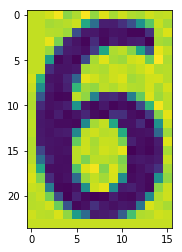

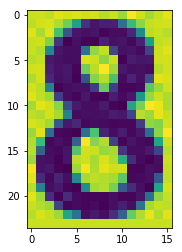

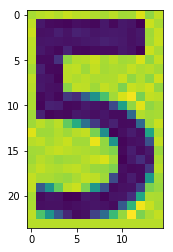

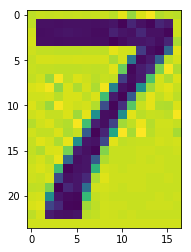

In [152]:
from matplotlib import pyplot as plt
data = []
for idx, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(os.path.join(dest, '{}.jpg'.format(idx)), dpi=100)

In [182]:
basewidth = 50
def saveKaptcha(dest):
    res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
    with open('kaptcha.jpg', 'wb') as f:
        f.write(res.content)
    pil_image = Image.open('kaptcha.jpg').convert('L') 
    open_cv_image = numpy.array(pil_image) 
    ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
    ary = []
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        if w >= 15 and h == 24:
            ary.append((x,y,w,h) )
    data = []
    for idx, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        box = (x, y, x+w, y+h)
        crpim = pil_image.crop(box).resize((60,40))
        crpim.save(os.path.join(dest, '{}.jpg'.format(idx)))


In [192]:
saveKaptcha('digits/')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [193]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (60, 40,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [194]:
training_set = train_datagen.flow_from_directory(
    'digits/', target_size = (60, 40),
     batch_size = 10,
     class_mode = 'categorical')

Found 44 images belonging to 10 classes.


In [197]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=10,
                         steps_per_epoch = 10,
                         verbose = 1)

Epoch 1/10
 6/10 [=================>............] - ETA: 0s - loss: 2.4435e-05 - acc: 1.0000

C:\ProgramData\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\ProgramData\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=10, verbose=1, epochs=10, validation_steps=10)`
  """


10/10 [==============================] - 0s 29ms/step - loss: 4.0670e-05 - acc: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 28ms/step - loss: 4.3371e-05 - acc: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 27ms/step - loss: 4.5360e-05 - acc: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 27ms/step - loss: 4.0787e-05 - acc: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 29ms/step - loss: 3.8631e-05 - acc: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 28ms/step - loss: 2.5825e-05 - acc: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 28ms/step - loss: 3.8060e-05 - acc: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 28ms/step - loss: 2.8640e-05 - acc: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 29ms/step - loss: 2.7328e-05 - acc: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 28ms/step - loss: 2.9497e-05 - acc: 1.0000


In [198]:
saveKaptcha('digits/')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [205]:
from keras.preprocessing import image
for f in os.listdir('digits/predict/'):
    fig = plt.figure()
    test_image = image.load_img('digits/predict/'+f, target_size= (60,40))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    print(classifier.predict_classes(test_image))
    #plt.imshow(img)

[2]
[9]
[7]
[4]
[4]
[8]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

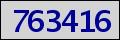

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [233]:
import requests
rs  = requests.session()
res = rs.get('http://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do')
with open('kaptcha.jpg', 'wb') as f:
    res2 = rs.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res2.content)
    
saveKaptcha('digits/predict2/')
Image.open('kaptcha.jpg')

In [234]:
from keras.preprocessing import image
ppath = 'digits/predict2/'
captcha = []
for f in os.listdir(ppath):
    fig = plt.figure()
    test_image = image.load_img(ppath+f, target_size= (60,40))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    captcha.append(str(classifier.predict_classes(test_image)[0]))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [235]:
''.join(captcha)

'763416'

In [ ]:
method: query
otherEnterFlag: false
useEUC: N
isShowEUC: N
queryKey: 
selCmpyType: 1
selQueryType: 2
queryStr: 24567645
brBanNo: 
imageCode: 434102

In [240]:
payload = {
'method':'query',
'otherEnterFlag':'false',
'useEUC':'N',
'isShowEUC':'N',
'selCmpyType':'1',
'selQueryType':'2',
'queryStr':'24567645',
'imageCode':''.join(captcha) 
}

headers ={
'Referer':'https://serv.gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do',
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36'   
} 
res3 = rs.post('https://serv.gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do', data = payload, headers = headers)
res3.encoding = 'cp950'

#print(res3.text)